# pandas 모듈: 데이터구조 Series

## Python: 데이터 분석을 위한 기본 모듈
- pandas: dataframe 구조 생성 및 조작
- matplotlib: 시각화
- scipy: 과학 및 공학 연산 -> 통계 분석
- numpy: 다차원 행렬 구조 생성 및 연산

In [75]:
#!pip install pandas numpy matplotlib scipy

## 1차원 데이터 구조 Series: 기본 특성
values 층위는 numpy.ndarray로 구성되어 있다.<br>
index 층위는 RangeIndex로 구성되어 있다.<br>
series = numpy.ndarray + RangeIndex

In [3]:
import pandas as pd
S = pd.Series([11, 28, 72, 3, 5, 8])
S

0    11
1    28
2    72
3     3
4     5
5     8
dtype: int64

In [3]:
type(S)

pandas.core.series.Series

In [4]:
S.values

array([11, 28, 72,  3,  5,  8])

In [5]:
type(S.values)

numpy.ndarray

In [6]:
S.index

RangeIndex(start=0, stop=6, step=1)

In [7]:
type(S.index)

pandas.core.indexes.range.RangeIndex

각 series는 dtype이 있다.<br>
dtype은 통계적(척도) 타입을 의미한다.<br>
척도(명목, 서열, 구간, 비율)를 대신하는 느낌으로 dtype

하나의 series는 하나의 dtype만 가진다.<br>
(list가 여러 타입을 가질 수 있던 것과 비교해보자)

In [8]:
pd.Series((11, 28))

0    11
1    28
dtype: int64

In [77]:
pd.Series((11.5, 28))

0    11.5
1    28.0
dtype: float64

In [75]:
pd.Series((True, False))

0     True
1    False
dtype: bool

In [10]:
pd.Series((True, 10))

0    True
1      10
dtype: object

In [78]:
pd.Series(('ab', 'bc'))

0    ab
1    bc
dtype: object

In [11]:
pd.Series(('ab', 20))

0    ab
1    20
dtype: object

## 숫자 인덱싱, 슬라이싱

- 인덱싱은 데이터 값만 가져온다.
- 슬라이싱은 데이터의 차원을 바꾸지 못한다.

In [209]:
a = pd.Series([11, 28, 72], index=range(1, 6, 2))
a

1    11
3    28
5    72
dtype: int64

In [83]:
a.index

RangeIndex(start=1, stop=6, step=2)

In [84]:
a[1]

np.int64(11)

In [ ]:
# a[0]
# 오류가 뜬다! 지금 인덱스가 1, 3, 5라서

KeyError: 0

In [148]:
a[0:1]

1    11
dtype: int64

In [149]:
a[1:3]

3    28
5    72
dtype: int64

## missing data
NaN: 결측치, not a data<br>
NaN이 하나라도 포함되면 dtype이 모두 **float64**로 바뀐다.<br>
int64도 float64가 되어 소수점 표기로 뜬다.

In [151]:
a

1    11
3    28
5    72
dtype: int64

In [152]:
a[3]

np.int64(28)

In [153]:
type(a[3])

numpy.int64

In [210]:
a[1] = None; a

1     NaN
3    28.0
5    72.0
dtype: float64

In [211]:
a[1]

np.float64(nan)

In [212]:
type(a[1])

numpy.float64

series에서 데이터를 바꿀 땐, 무조건 바꾸려는 데이터의 개수가 동일해야 한다.

In [292]:
import numpy as np
a[1:3] = [10, np.nan]; a

{'Ohio': 35000,
 'Texas': 71000,
 'Oregon': 16000,
 'Utah': 5000,
 slice(1, 3, None): [10, nan]}

In [214]:
a[2:3]

5   NaN
dtype: float64

In [159]:
a[5]

np.float64(nan)

In [160]:
type(a[5])

numpy.float64

**np.nan**과 **None**은 다른 자료형이다.

In [161]:
print(type(np.nan))
print(type(None))

<class 'float'>
<class 'NoneType'>


In [ ]:
# a.astype('int')
# IntCastingNaNError가 뜬다. NaN이 존재하기 때문에 타입을 전환할 수 없음.

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [225]:
a.fillna(0)

1     0.0
3    10.0
5     0.0
dtype: float64

In [226]:
a.fillna(0).astype('int')

1     0
3    10
5     0
dtype: int64

In [227]:
a

1     NaN
3    10.0
5     NaN
dtype: float64

## 문자열 인덱싱, 슬라이싱

In [228]:
b = pd.Series([11, 28, 72], index=list('abc')); b

a    11
b    28
c    72
dtype: int64

FutureWarning은 향후 버전에서 정수 인덱싱을 사용할 수 없게 만들 거라는 것이다.

In [220]:
b[0]

C:\Users\yunji\AppData\Local\Temp\ipykernel_13320\172979841.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b[0]


np.int64(11)

In [221]:
b['b'] # 차원이 없는 개별 값을 출력한다.

np.int64(28)

In [223]:
b['b':'c'] # 두 개의 범위가 둘 다 출력된다.

b    28
c    72
dtype: int64

인덱스가 같은 게 여러 개 있을 땐 시리즈로 출력되는데, 이건 인덱싱인지 슬라이싱인지?


In [231]:
b.index

Index(['a', 'b', 'c'], dtype='object')

In [232]:
b.values

array([11, 28, 72])

## 인덱스 자격

In [233]:
b = pd.Series([11, 28, 72], index=list('abc')); b

a    11
b    28
c    72
dtype: int64

In [234]:
b.index = range(3); b

0    11
1    28
2    72
dtype: int64

In [235]:
b.index = [('a',), ('b',), ('c',)]; b

(a,)    11
(b,)    28
(c,)    72
dtype: int64

In [175]:
# b.index = [['a'], ['b'], ['c']]; b

## Fancy indexing

In [236]:
c = pd.Series([11, 28, 72], index=['a', 'b', 'b']); c

a    11
b    28
b    72
dtype: int64

In [237]:
c['b']

b    28
b    72
dtype: int64

In [178]:
c['b'] = 3; c # 모두 바뀐다.

a    11
b     3
b     3
dtype: int64

In [179]:
c[['b', 'a']]

b     3
b     3
a    11
dtype: int64

In [180]:
c[['b', 'a', 'b']]

b     3
b     3
a    11
b     3
b     3
dtype: int64

## Series: 연산

In [181]:
a = pd.Series([3, 10, np.nan], index=np.arange(1, 6, 2)); a

1     3.0
3    10.0
5     NaN
dtype: float64

단순 a라고 쓰면 value 층위를 다룬다.<br>
만약 값을 다루고 싶다면 .values를 붙여야 한다.

In [182]:
1 in a

True

In [183]:
10 in a

False

In [184]:
a.values

array([ 3., 10., nan])

In [185]:
10 in a.values

True

In [186]:
np.nan in a.values

False

In [187]:
a.isnull()

1    False
3    False
5     True
dtype: bool

In [188]:
a

1     3.0
3    10.0
5     NaN
dtype: float64

In [189]:
a + 10

1    13.0
3    20.0
5     NaN
dtype: float64

In [190]:
a + [1,2,3]

1     4.0
3    12.0
5     NaN
dtype: float64

In [191]:
a + a

1     6.0
3    20.0
5     NaN
dtype: float64

In [192]:
# a + [1, 2]

In [193]:
0 < a

1     True
3     True
5    False
dtype: bool

In [194]:
a[0 < a]

1     3.0
3    10.0
dtype: float64

In [195]:
a[(0 < a) | (a < 10)]

1     3.0
3    10.0
dtype: float64

In [196]:
a[(0 < a) & (a < 10)]

1    3.0
dtype: float64

In [238]:
fruits = ['apples', 'oranges', 'cherries', 'pears']
s1 = pd.Series([20, 33, 52, 10], index=fruits)
s1

apples      20
oranges     33
cherries    52
pears       10
dtype: int64

In [239]:
s2 = pd.Series([17, 13, 31, 32], index=sorted(fruits))
s2

apples      17
cherries    13
oranges     31
pears       32
dtype: int64

정렬된 것과 더하면 그 정렬된 것 순으로 정렬된다.<br>
시리즈끼리의 연산 결과는 시리즈이다.

In [240]:
s1 + s2

apples      37
cherries    65
oranges     64
pears       42
dtype: int64

In [241]:
print("합계: ", sum(s1) + s2.sum())

합계:  208


## 사전을 이용한 Series 생성

In [243]:
a = {'Ohio':35000, 'Texas':71000, 'Oregon':16000, 'Utah':5000}
b = pd.Series(a); b

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

pd.Series(data=, index=, ...)<br>

In [250]:
c = ['Ohio', 'California', 'Texas', 'Oregon']
d = pd.Series(a, c); d

Ohio          35000.0
California        NaN
Texas         71000.0
Oregon        16000.0
dtype: float64

In [252]:
d[d.isnull()] = 0; d

Ohio          35000.0
California        0.0
Texas         71000.0
Oregon        16000.0
dtype: float64

concat: 함수, 원본 series를 바꾸지 않는다.<br>
drop: 메소드, 원본 series를 바꾸지 않는다.

In [255]:
pd.concat([d, pd.Series({'Arizona':10000})])

Ohio          35000.0
California        0.0
Texas         71000.0
Oregon        16000.0
Arizona       10000.0
dtype: float64

In [258]:
d.drop(['Ohio', 'Texas'])

California        0.0
Oregon        16000.0
dtype: float64

## 연습문제 1

range는 int만 사용할 수 있지만, np.arange는 float도 사용할 수 있다!

In [2]:
import pandas as pd, numpy as np
S = pd.Series(np.arange(0., 11, 2), index=list('abc'*2)); S

a     0.0
b     2.0
c     4.0
a     6.0
b     8.0
c    10.0
dtype: float64

In [3]:
S[0:3]

a    0.0
b    2.0
c    4.0
dtype: float64

In [4]:
S[list('abc')]

a     0.0
a     6.0
b     2.0
b     8.0
c     4.0
c    10.0
dtype: float64

## 연습문제 2

In [5]:
S['a'] = np.nan; S

a     NaN
b     2.0
c     4.0
a     NaN
b     8.0
c    10.0
dtype: float64

In [6]:
S[S.isnull()] = 100; S

a    100.0
b      2.0
c      4.0
a    100.0
b      8.0
c     10.0
dtype: float64

시험범위는 연습문제 2까지!

## 연습문제 3

In [7]:
pd.concat([S, pd.Series({'a':200, 'b':10, 'c': 14})])

a    100.0
b      2.0
c      4.0
a    100.0
b      8.0
c     10.0
a    200.0
b     10.0
c     14.0
dtype: float64

In [8]:
import pandas as pd
import numpy as np
a = pd.Series(['appal', 'adf', np.nan], index=range(1, 6, 2))
type(a[5])

float

## 범주형 데이터 타입

### dtype "category"
category는 명목척도라고 생각하면 된다.

In [9]:
import pandas as pd
a = pd.Series(["low", "mid", "high", "low"]); a

0     low
1     mid
2    high
3     low
dtype: object

In [10]:
a.astype('category')

0     low
1     mid
2    high
3     low
dtype: category
Categories (3, object): ['high', 'low', 'mid']

In [11]:
b = pd.Series(["low", "mid", "high", "low"], dtype="category")

In [12]:
b.values

['low', 'mid', 'high', 'low']
Categories (3, object): ['high', 'low', 'mid']

In [13]:
type(b.values)

pandas.core.arrays.categorical.Categorical

In [14]:
b.cat.categories

Index(['high', 'low', 'mid'], dtype='object')

알파벳 오름차순으로 지정된다.<br>
일반적인 직관과 맞지 않는다는 문제가 있기에, reorder_categories를 사용해준다.

In [15]:
b.cat.reorder_categories(["low", "mid", "high"]).values

['low', 'mid', 'high', 'low']
Categories (3, object): ['low', 'mid', 'high']

27ㅔ 안 씀
### 왜 사용할까?

In [16]:
b

0     low
1     mid
2    high
3     low
dtype: category
Categories (3, object): ['high', 'low', 'mid']

In [17]:
b.values

['low', 'mid', 'high', 'low']
Categories (3, object): ['high', 'low', 'mid']

빈도 내림차순으로 정렬해주는 함수는 value_count()이다.<br>
동일 빈도인 경우엔, 설정해준 인덱스 순서대로 출력된다.

In [20]:
b.cat.reorder_categories(["high", "low", "mid"]).value_counts()

low     2
high    1
mid     1
Name: count, dtype: int64

In [21]:
b.value_counts()

low     2
high    1
mid     1
Name: count, dtype: int64

In [22]:
b.cat.reorder_categories(['high', 'mid', 'low']).value_counts().sort_index()

high    1
mid     1
low     2
Name: count, dtype: int64

In [23]:
b.value_counts().sort_index()

high    1
low     2
mid     1
Name: count, dtype: int64

<Axes: >

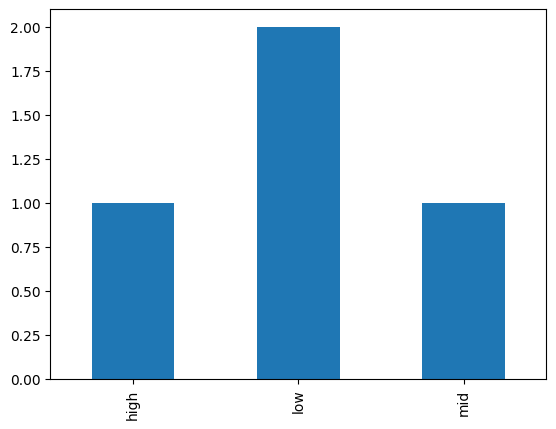

In [24]:
b.value_counts().sort_index(ascending=True).plot(kind='bar')

<Axes: >

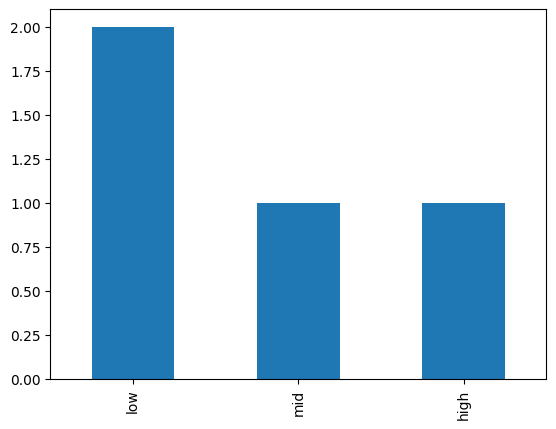

In [25]:
b.cat.reorder_categories(["high", "mid", "low"]).value_counts().sort_index(ascending=False).plot(kind='bar')